# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics         import accuracy_score

In [2]:
X_train = pd.read_csv(r'C:\Users\feldb\OneDrive\Documentos\Ebac\Tarefas\Modulo 17\Mod17Ex02\X_train.csv')
X_test = pd.read_csv(r'C:\Users\feldb\OneDrive\Documentos\Ebac\Tarefas\Modulo 17\Mod17Ex02\X_test.csv')

In [3]:
X_train = X_train.drop('Unnamed: 0', axis=1)
X_train = X_train.fillna(0)
X_train.shape

(7352, 562)

In [4]:
y_train = pd.read_csv(r'C:\Users\feldb\OneDrive\Documentos\Ebac\Tarefas\Modulo 17\Mod17Ex01\UCI HAR Dataset\train\y_train.txt',delim_whitespace=True,header=None).to_numpy()
y_train  = pd.DataFrame(y_train).reset_index(drop=True)
y_train.shape

(7352, 1)

In [5]:
X_test = X_test.drop('Unnamed: 0', axis=1).reset_index(drop=True)
X_test.shape

(2947, 562)

In [6]:
y_test = pd.read_csv(r'C:\Users\feldb\OneDrive\Documentos\Ebac\Tarefas\Modulo 17\Mod17Ex01\UCI HAR Dataset\test\y_test.txt',delim_whitespace=True,header=None).to_numpy()
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y_test.shape

(2947, 1)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [8]:
clf = DecisionTreeClassifier(max_depth=4, random_state=100)
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9020674646354734

In [9]:
attributes = list(X_train)
sorted(zip(clf.feature_importances_, attributes), reverse=True)

[(0.28028805368454934, 'angle(X,gravityMean)'),
 (0.2534310842651858, 'fBodyAccJerk-bandsEnergy()-1,16'),
 (0.172169335584583, 'angle(Y,gravityMean)'),
 (0.13438131642443318, 'tBodyAccMag-std()'),
 (0.12459437929284682, 'tGravityAcc-arCoeff()-Z,2'),
 (0.01785342678695115, 'tBodyGyro-correlation()-Y,Z'),
 (0.011365710407636367, 'tGravityAcc-energy()-Y'),
 (0.005916693553814442, 'tBodyGyro-min()-X'),
 (0.0, 'tGravityAccMag-std()'),
 (0.0, 'tGravityAccMag-sma()'),
 (0.0, 'tGravityAccMag-min()'),
 (0.0, 'tGravityAccMag-mean()'),
 (0.0, 'tGravityAccMag-max()'),
 (0.0, 'tGravityAccMag-mad()'),
 (0.0, 'tGravityAccMag-iqr()'),
 (0.0, 'tGravityAccMag-entropy()'),
 (0.0, 'tGravityAccMag-energy()'),
 (0.0, 'tGravityAccMag-arCoeff()4'),
 (0.0, 'tGravityAccMag-arCoeff()3'),
 (0.0, 'tGravityAccMag-arCoeff()2'),
 (0.0, 'tGravityAccMag-arCoeff()1'),
 (0.0, 'tGravityAcc-std()-Z'),
 (0.0, 'tGravityAcc-std()-Y'),
 (0.0, 'tGravityAcc-std()-X'),
 (0.0, 'tGravityAcc-sma()'),
 (0.0, 'tGravityAcc-min()-Z'),
 

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [17]:
X_train = X_train[['angle(X,gravityMean)', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']]
X_test = X_test[['angle(X,gravityMean)', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']]
X_valid = X_valid[['angle(X,gravityMean)', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']]

In [18]:
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_valid, y_valid)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [19]:
ccp_alphas

array([0.        , 0.00040805, 0.00040805, 0.00043526, 0.00046635,
       0.00046635, 0.00046635, 0.00046635, 0.00046635, 0.00046635,
       0.00047606, 0.00049461, 0.0005078 , 0.00051007, 0.00051816,
       0.00052593, 0.00052975, 0.0005308 , 0.00053469, 0.00053583,
       0.00054098, 0.00054407, 0.00058034, 0.00059304, 0.00061791,
       0.00062179, 0.00062179, 0.00062179, 0.00065288, 0.00065288,
       0.00065948, 0.00066962, 0.00068822, 0.00068915, 0.00069952,
       0.00070729, 0.00071378, 0.00071895, 0.00072543, 0.00072543,
       0.00072543, 0.00072543, 0.00072543, 0.00072543, 0.00074096,
       0.0007537 , 0.00078588, 0.00081515, 0.0008161 , 0.0008161 ,
       0.0008161 , 0.00083211, 0.00085088, 0.00087051, 0.00089103,
       0.00090012, 0.00090678, 0.00090678, 0.00090678, 0.00091731,
       0.00093269, 0.00093269, 0.00093537, 0.00095096, 0.00095212,
       0.00095229, 0.00095699, 0.00097933, 0.00099352, 0.00100754,
       0.00103801, 0.00104712, 0.00104928, 0.00106973, 0.00109

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

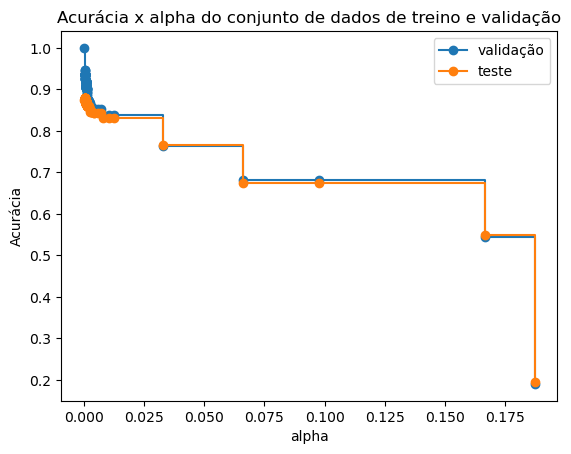

In [21]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [25]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 87.98


DecisionTreeClassifier(ccp_alpha=0.0005259339862169022, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 66.78


C:\Users\feldb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


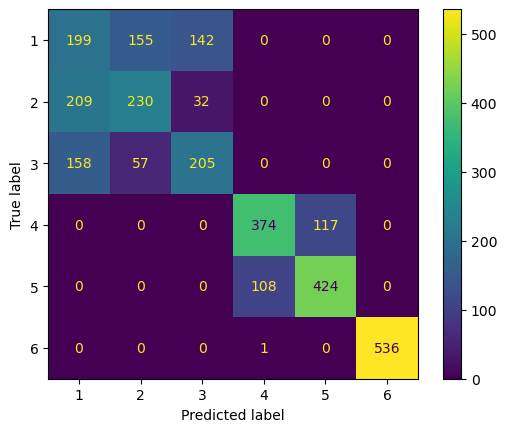

In [27]:
acuracia_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, X_test, y_test);